Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file and display the variables names.

In [26]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()
resp.columns

Index([u'caseid', u'rscrinf', u'rdormres', u'rostscrn', u'rscreenhisp',
       u'rscreenrace', u'age_a', u'age_r', u'cmbirth', u'agescrn',
       ...
       u'pubassis_i', u'basewgt', u'adj_mod_basewgt', u'finalwgt', u'secu_r',
       u'sest', u'cmintvw', u'cmlstyr', u'screentime', u'intvlngth'],
      dtype='object', length=3087)

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

In [27]:
import thinkstats2
hist = thinkstats2.Hist(resp.totincr)
print type(hist)

<class 'thinkstats2.Hist'>


Display the histogram.

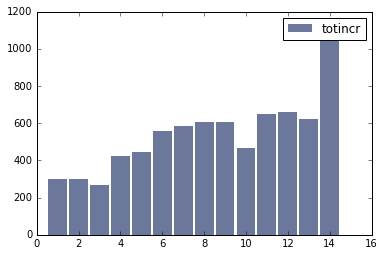

In [28]:
import thinkplot
thinkplot.Hist(hist, label='totincr')
thinkplot.Show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

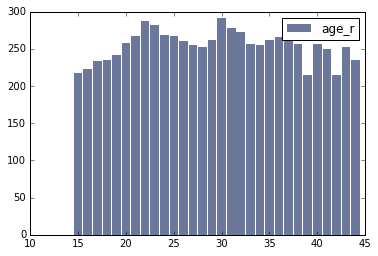

In [29]:
hist = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(hist, label='age_r')
thinkplot.Show()

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

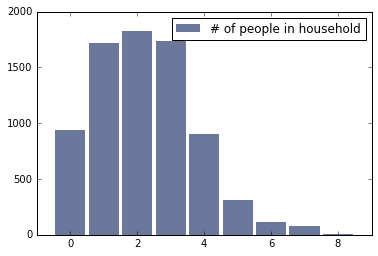

In [30]:
hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist, label = '# of people in household')
thinkplot.Show()

Make a histogram of <tt>parity</tt>, the number children the respondent has borne.  How would you describe this distribution?

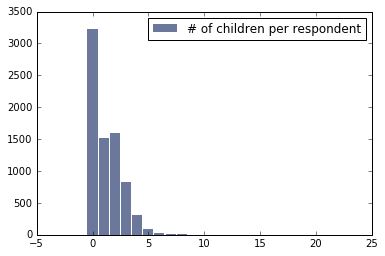

In [31]:
hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist, label = '# of children per respondent')
thinkplot.Show()

<p>
       The distribution is not a normal distribution most values fall within the range of 0-5. 
</p>

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [32]:
for value,number in hist.Largest(15):
    print value,number

22 1
16 1
10 3
9 2
8 8
7 15
6 29
5 95
4 309
3 828
2 1603
1 1519
0 3230


Use <tt>totincr</tt> to select the respondents with the highest income.  Compute the distribution of <tt>parity</tt> for just the high income respondents.

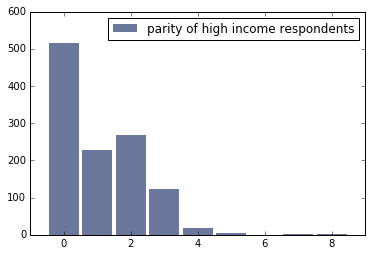

In [33]:
max_value = resp['totincr'].max()

highest_income_respondents = resp[resp.totincr == max_value]
hist = thinkstats2.Hist(highest_income_respondents.parity)
thinkplot.Hist(hist, label = 'parity of high income respondents')
thinkplot.Show()


Find the largest parities for high income respondents.

In [34]:
for value,number in hist.Largest(10):
    print value,number

8 1
7 1
5 5
4 19
3 123
2 267
1 229
0 515


Compare the mean <tt>parity</tt> for high income respondents and others.

In [35]:
print resp['parity'].mean()
print highest_income_respondents['parity'].mean()

1.22321078111
1.07586206897


Investigate any other variables that look interesting.

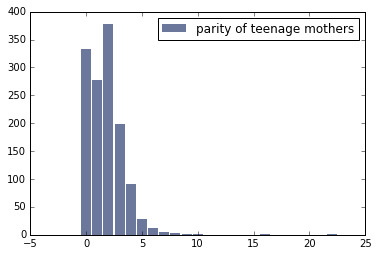

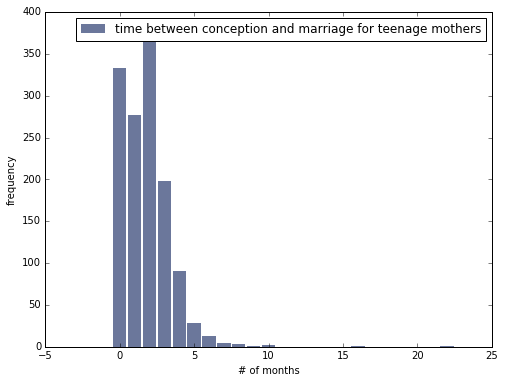

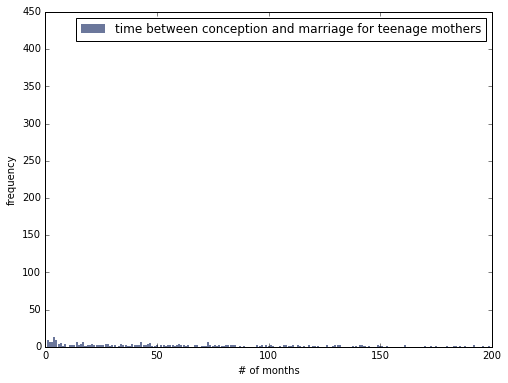

In [62]:
new_data = resp[resp.agemomb1 == 1]

hist = thinkstats2.Hist(new_data.parity)
thinkplot.Hist(hist, label = 'parity of teenage mothers')
thinkplot.Show()

hist2 = thinkstats2.Hist(new_data.con1mar1)
thinkplot.Hist(hist, label = 'time between conception and marriage for teenage mothers')
thinkplot.Show(xlabel = '# of months', ylabel = 'frequency')

max_value = resp['totincr'].max()

highest_income_respondents = resp[resp.totincr == max_value]
hist = thinkstats2.Hist(highest_income_respondents.con1mar1)
thinkplot.Hist(hist, label = 'time between conception and marriage for teenage mothers')
thinkplot.Config(xlim = [0,200], ylim = [0,50])
thinkplot.Show(xlabel = '# of months', ylabel = 'frequency')


In [ ]:
### Exercise 4

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length? 

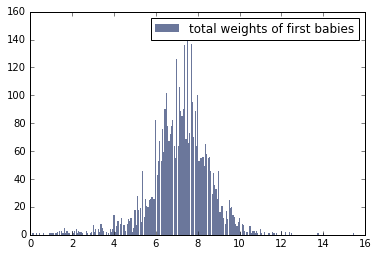

7.20109443044


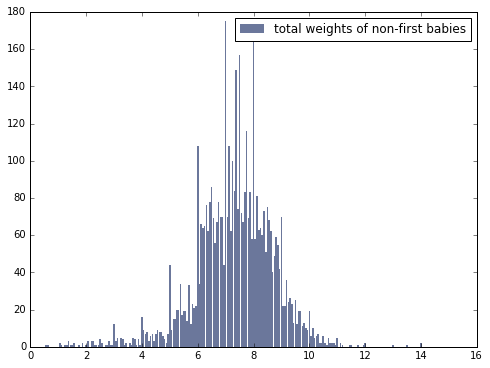

7.32585561497
Cohen effect for total weight:
-0.0886729270726

Cohen effect for pregnancy length:
0.0288790446544


In [49]:
import nsfg
import math
preg = nsfg.ReadFemPreg()

live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

hist = thinkstats2.Hist(firsts.totalwgt_lb)
thinkplot.Hist(hist, label = 'total weights of first babies')
thinkplot.Show()

print firsts['totalwgt_lb'].mean()

hist2 = thinkstats2.Hist(others.totalwgt_lb)
thinkplot.Hist(hist2, label = 'total weights of non-first babies')
thinkplot.Show()

print others['totalwgt_lb'].mean()

def CohenEffectSize(group1,group2):
    diff = group1.mean() - group2.mean()
    
    var1 = group1.var()
    var2 = group2.var()
    n1,n2 = len(group1), len(group2)
    
    pooled_var = (n1 * var1 + n2 * var2)/(n1+n2)
    d = diff/math.sqrt(pooled_var)
    return d 

print "Cohen effect for total weight:"
print CohenEffectSize(firsts['totalwgt_lb'], others['totalwgt_lb'])
print ""
print "Cohen effect for pregnancy length:"
print CohenEffectSize(firsts['prglngth'],others['prglngth'])

<p>
    The Cohen d for total weight vs pregnancy length of firstborns vs non firstborns are both very small with a smaller standard deviation difference in total weight between firstborn and nonfirstborn births
</p>